In [77]:
x=[]
y=[]
for i in range(-20,20):
  f=(3*i)-2
  x.append(i)
  y.append(f)
print(x)
print(y)

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[-62, -59, -56, -53, -50, -47, -44, -41, -38, -35, -32, -29, -26, -23, -20, -17, -14, -11, -8, -5, -2, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55]


Red neuronal para lograr hallar la funcion f

In [78]:
import tensorflow as tf
import numpy as np


In [79]:
variableX=np.array(x,dtype=float)
variableY=np.array(y,dtype=float)


In [84]:
#capa=tf.keras.layers.Dense(units=1,input_shape=[1])
#modelo=tf.keras.Sequential([capa])
capa_oculta1=tf.keras.layers.Dense(units=3,input_shape=[1])
capa_oculta2=tf.keras.layers.Dense(units=3)
capa_salida=tf.keras.layers.Dense(units=1)
modelo=tf.keras.Sequential([capa_oculta1,capa_oculta2,capa_salida])

In [85]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), #0.1 tasa de aprendizaje si es muy pequeño aprende muy despacio, muy grande no hace cambios muy finos
    loss='mean_squared_error'                # funcion perdida, concidera que un poco cantidad de error grandes es peor que un gran c andidad deeror pequeños
)

In [86]:
print("--- Entrenamiento ---")
H=modelo.fit(variableX,variableY,epochs=100,verbose=False)  #100 es la cantidad de vueltas que lo intente y recorra los datos
print("--fin de entrenamiento---")

--- Entrenamiento ---
--fin de entrenamiento---


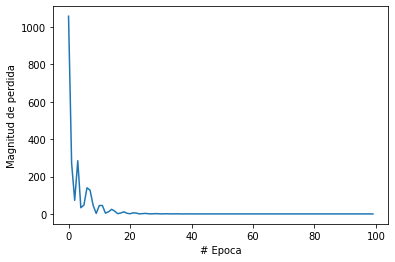

In [87]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(H.history["loss"])

In [88]:
print("---Prediccion---")
resultado=modelo.predict([81])
print("Resultado: ",resultado)
r=(3*81)-2
print("resultado verdadero: ",r)

---Prediccion---
Resultado:  [[240.99602]]
resultado verdadero:  241


In [89]:
print("varibles internas del modelo")
print(capa_oculta1.get_weights())
print(capa_oculta2.get_weights())
print(capa_salida.get_weights())

varibles internas del modelo
[array([[0.44469562, 1.4623283 , 0.636635  ]], dtype=float32), array([ 0.45642897, -0.3915698 , -0.01305176], dtype=float32)]
[array([[-0.5174116 ,  0.8286178 ,  0.27446565],
       [-0.9916613 ,  0.41399306, -0.748709  ],
       [-0.30237582,  0.2772144 , -0.8187634 ]], dtype=float32), array([ 0.576864  , -0.572706  ,  0.53763413], dtype=float32)]
[array([[-0.9171891 ],
       [ 0.54861957],
       [-0.43585557]], dtype=float32), array([-0.7086884], dtype=float32)]


la aproximacion no es para nada acertada, esto puede ser por la cantidad de datos o por que solo se esta usando una saola capa, no esta bien entrenadp

PLATEAMOS UN MODELOS CON MAS CAPAS Y NEURONAS PARA VER QUE TAL LE VA